**Preprocessing data and Exploratory data analysis**

In [ ]:
#Importing necessary libraries
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
import time
import matplotlib.pyplot as plt
import seaborn as sns

# install selenium chrome driver from https://chromedriver.chromium.org/downloads
# xattr -d com.apple.quarantine chromedriver

In [1]:
#Defining range of years from which we want to scrape our data
years = list(range(1991,2024))

**MVP Player Votes from 1990-1991 season to 2023-2024**

In [ ]:
#base url for MVP Voting pages
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

#Loop through each year and download corresponding webpages
for year in years:
    url = url_start.format(year)
    
    data = requests.get(url)
    time.sleep(15)
    
    with open("../mvp_votes/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [ ]:
#Parsing saved html files and extracting voting data
dfs = []
for year in years:
    with open("../mvp_votes/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find_all(id="mvp")[0]
    mvp_df = pd.read_html(str(mvp_table))[0]
    mvp_df["Year"] = year
    dfs.append(mvp_df)

In [ ]:
#Combine individual into single
mvps = pd.concat(dfs)
mvps.head()

In [6]:
mvps.to_csv("../mvp_votes/mvp_votes.csv")

**Extracting Player stats per game from 1990-91 to 2023-2024 season.**

In [ ]:
#Base url for extracting stats
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    time.sleep(20)
    
    with open("../player_stats/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [2]:
# driver = webdriver.Chrome(
#     service=Service(executable_path="C:/Users/vuyyu/Desktop/Program_Installers/chromedriver-win64/chrome-win64/chromedriver.exe")
#     )

In [12]:
for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(15)
    
    with open("../player_stats/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(driver.page_source)

In [ ]:
#Combining individual player stats into one
dfs = []
for year in years:
    with open("../player_stats/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

In [20]:
players = pd.concat(dfs)
players.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Year
0,1,Chris Mullin,27,GSW,SF,82,82,3315,21.4,.618,...,9.7,2.4,12.2,.176,4.5,0.1,4.7,5.6,"AS,NBA2",1991
1,2,Karl Malone,27,UTA,PF,82,82,3302,24.8,.596,...,9.9,5.6,15.5,.225,4.8,0.6,5.4,6.2,"MVP-5,AS,NBA1",1991
2,3,Tim Hardaway,24,GSW,PG,82,82,3215,20.9,.547,...,7.4,2.5,9.9,.148,4.5,-0.1,4.4,5.2,"MVP-19,AS",1991
3,4,Tyrone Corbin,28,MIN,SF,82,82,3196,16.6,.499,...,2.6,2.9,5.4,.081,0.5,0.4,0.9,2.3,NaN,1991
4,5,Pooh Richardson,24,MIN,PG,82,82,3154,18.1,.492,...,4.5,1.3,5.9,.089,3.1,-1.1,2.0,3.2,NaN,1991


In [10]:
players.to_csv("../player_stats/players_stats.csv")

**Getting Advanced stats of each player from 1990-91 to 2023-2024 season.**

In [ ]:
#Base url for advanced stats
advanced_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html"

for year in years:
    url = advanced_stats_url.format(year)
    
    data = requests.get(url)
    time.sleep(15)
    
    with open("../advanced_stats/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [17]:
for year in years:
    url = advanced_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(10)
    
    with open("../advanced_stats/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(driver.page_source)

In [ ]:
#Combining each individual into group
dfs = []
for year in years:
    with open("../advanced_stats/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="all_advanced")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

In [12]:
players_advanced = pd.concat(dfs)
players_advanced.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Year
0,1,Chris Mullin,27,GSW,SF,82,82,3315,21.4,.618,...,9.7,2.4,12.2,.176,4.5,0.1,4.7,5.6,"AS,NBA2",1991
1,2,Karl Malone,27,UTA,PF,82,82,3302,24.8,.596,...,9.9,5.6,15.5,.225,4.8,0.6,5.4,6.2,"MVP-5,AS,NBA1",1991
2,3,Tim Hardaway,24,GSW,PG,82,82,3215,20.9,.547,...,7.4,2.5,9.9,.148,4.5,-0.1,4.4,5.2,"MVP-19,AS",1991
3,4,Tyrone Corbin,28,MIN,SF,82,82,3196,16.6,.499,...,2.6,2.9,5.4,.081,0.5,0.4,0.9,2.3,NaN,1991
4,5,Pooh Richardson,24,MIN,PG,82,82,3154,18.1,.492,...,4.5,1.3,5.9,.089,3.1,-1.1,2.0,3.2,NaN,1991


In [21]:
players_advanced.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Awards', 'Year'],
      dtype='object')

In [22]:
# del players_advanced["Unnamed: 19"]
# del players_advanced["Unnamed: 24"]

In [23]:
players_advanced.to_csv("../advanced_stats/players_advanced_stats.csv")

**Getting team standings from 1990-91 to 2023-2024 season.**

In [ ]:
#Base url for team standings
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [4]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    time.sleep(15)
    
    with open("../team_standings/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [5]:
dfs = []
for year in years:
    with open("../team_standings/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)

In [6]:
team_standings = pd.concat(dfs)

In [7]:
team_standings.to_csv("team_standings.csv")

**Data cleaning and combining mvp votes, player stats, advanced stats and respective team standings.**

In [8]:
mvps = pd.read_csv("../mvp_votes/mvp_votes.csv")
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891,960,0.928
1,Magic Johnson,1991,497,960,0.518
2,David Robinson,1991,476,960,0.496
3,Charles Barkley,1991,222,960,0.231
4,Karl Malone,1991,142,960,0.148
...,...,...,...,...,...
503,Jalen Brunson,2024,142,990,0.143
504,Jayson Tatum,2024,86,990,0.087
505,Anthony Edwards,2024,18,990,0.018
506,Domantas Sabonis,2024,3,990,0.003


In [9]:
players = pd.read_csv("../player_stats/players_stats.csv")
del players["Rk"]
del players["Unnamed: 0"]

In [10]:
advanced_stats = pd.read_csv("../advanced_stats/players_advanced_stats.csv")
del advanced_stats["Unnamed: 0"]

In [15]:
players["Player"] = players["Player"].str.replace("*","",regex=False)
advanced_stats["Player"] = advanced_stats["Player"].str.replace("*","",regex=False)
advanced_stats.drop('Awards', axis=1, inplace=True)
advanced_stats.drop(advanced_stats.tail(1).index, inplace=True)

In [19]:
advanced_stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Chris Mullin,27,GSW,SF,82,82,3315,21.4,.618,...,23.5,9.7,2.4,12.2,.176,4.5,0.1,4.7,5.6,1991
1,2,Karl Malone,27,UTA,PF,82,82,3302,24.8,.596,...,30.1,9.9,5.6,15.5,.225,4.8,0.6,5.4,6.2,1991
2,3,Tim Hardaway,24,GSW,PG,82,82,3215,20.9,.547,...,24.7,7.4,2.5,9.9,.148,4.5,-0.1,4.4,5.2,1991
3,4,Tyrone Corbin,28,MIN,SF,82,82,3196,16.6,.499,...,22.7,2.6,2.9,5.4,.081,0.5,0.4,0.9,2.3,1991
4,5,Pooh Richardson,24,MIN,PG,82,82,3154,18.1,.492,...,21.8,4.5,1.3,5.9,.089,3.1,-1.1,2.0,3.2,1991


In [20]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Team"] == "TOT"]
        row["Team"] = df.iloc[-1,:]["Team"]
        return row
advanced_stats = advanced_stats.groupby(["Player", "Year"]).apply(single_row)
players = players.groupby(["Player", "Year"]).apply(single_row)

In [21]:
advanced_stats.index = advanced_stats.index.droplevel()
advanced_stats.index = advanced_stats.index.droplevel()

In [22]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [23]:
advanced_stats = advanced_stats[['Player','Year','PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

In [24]:
advanced_stats

,Player,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
122,A.C. Green,1991,13.8,.556,.101,.557,11.3,16.2,13.8,4.5,...,12.8,15.6,3.2,2.9,6.1,.135,0.1,-0.2,0.0,1.1
499,A.C. Green,1992,16.7,.556,.070,.569,11.8,18.2,14.9,6.0,...,10.0,16.8,5.8,2.9,8.8,.145,1.7,-1.0,0.7,2.0
991,A.C. Green,1993,16.3,.603,.065,.531,11.5,17.3,14.4,5.9,...,11.8,15.0,6.1,2.6,8.6,.147,1.6,-0.9,0.7,1.9
1463,A.C. Green,1994,17.0,.555,.038,.391,11.1,18.8,15.0,6.9,...,8.4,17.6,6.7,2.6,9.3,.157,1.8,-1.2,0.6,1.8
1995,A.C. Green,1995,14.2,.596,.206,.556,8.3,20.4,14.3,6.5,...,12.9,14.2,4.6,2.1,6.7,.120,0.8,-0.9,-0.1,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,Žarko Čabarkapa,2006,9.9,.472,.115,.483,8.0,16.7,12.3,6.5,...,14.2,21.7,-0.2,0.5,0.3,.031,-4.7,-0.6,-5.3,-0.4
6119,Željko Rebrača,2002,16.2,.569,.000,.468,8.4,20.5,14.5,5.7,...,15.7,21.4,1.4,1.9,3.3,.134,-2.9,0.6,-2.3,-0.1
6750,Željko Rebrača,2003,14.0,.596,.000,.331,6.5,16.0,11.2,3.6,...,14.9,19.2,0.7,0.7,1.3,.133,-2.8,0.2,-2.6,-0.1
7878,Željko Rebrača,2005,14.0,.625,.000,.363,6.5,16.9,11.9,4.8,...,15.3,16.0,1.4,0.9,2.4,.122,-1.7,0.4,-1.3,0.2


In [25]:
players = players.merge(advanced_stats, how="outer", on=["Player", "Year"])
players

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,12.8,15.6,3.2,2.9,6.1,.135,0.1,-0.2,0.0,1.1
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,10.0,16.8,5.8,2.9,8.8,.145,1.7,-1.0,0.7,2.0
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,11.8,15.0,6.1,2.6,8.6,.147,1.6,-0.9,0.7,1.9
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,8.4,17.6,6.7,2.6,9.3,.157,1.8,-1.2,0.6,1.8
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,12.9,14.2,4.6,2.1,6.7,.120,0.8,-0.9,-0.1,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14006,Žarko Čabarkapa,24,GSW,PF,61,0,8.3,1.1,2.9,.385,...,14.2,21.7,-0.2,0.5,0.3,.031,-4.7,-0.6,-5.3,-0.4
14007,Željko Rebrača,29,DET,C,74,4,15.9,2.6,5.1,.505,...,15.7,21.4,1.4,1.9,3.3,.134,-2.9,0.6,-2.3,-0.1
14008,Željko Rebrača,30,DET,C,30,12,16.3,2.7,4.8,.552,...,14.9,19.2,0.7,0.7,1.3,.133,-2.8,0.2,-2.6,-0.1
14009,Željko Rebrača,32,LAC,C,58,2,16.0,2.3,4.0,.568,...,15.3,16.0,1.4,0.9,2.4,.122,-1.7,0.4,-1.3,0.2


In [26]:
players.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards',
       'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
#dropping awards column
players.drop("Awards", axis=1, inplace=True)

In [28]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [29]:
combined.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share'],
      dtype='object')

In [30]:
teams = pd.read_csv("../team_standings/team_standings.csv")
teams = teams[~teams["W"].str.contains("Division")]

In [ ]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

**Changing abbreviation of team to full team name**

In [32]:
nicknames = {}

with open("../team_standings/nicknames.txt") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [34]:
combined["Team"] = combined["Team"].map(nicknames)

In [35]:
stats = combined.merge(teams, how = "outer", on = ["Team", "Year"])

In [36]:
del stats["Unnamed: 0"]

In [ ]:
# converting stats to numeric data types
stats = stats.apply(pd.to_numeric, errors="ignore")

In [38]:
stats.dtypes

Player      object
Age        float64
Team        object
Pos         object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
PER        float64
TS%        float64
3PAr       float64
FTr        float64
ORB%       float64
DRB%       float64
TRB%       float64
AST%       float64
STL%       float64
BLK%       float64
TOV%       float64
USG%       float64
OWS        float64
DWS        float64
WS         float64
WS/48      float64
OBPM       float64
DBPM       float64
BPM        float64
VORP       float64
Pts Won    float64
Pts Max    float64
Share      f

In [39]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '42.0', '18.0', '6.0', '24.0',
       '26.0', nan, '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '3.0', '1.0', '13.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0',
       '16.0', '41.0', '12.0', '10.0', '30.0', '34.0', '4.0', '1.5',
       '22.0', '51.0', '39.0', '18.5', '31.0', '48.0', '40.0', '17.0',
       '46.0', '10.5', '32.0', '38.0', '27.0', '33.0', '50.0', '43.0',
       '45.0', '25.5', '36.0', '3.5', '20.5', '11.5', '44.0', '52.0',
       '56.0', '2.5', '12.5', '32.5', '21.5', '4.5', '47.0', '22.5'],
      dtype=object)

In [40]:
stats["GB"] = stats["GB"].str.replace("—","0")

In [41]:
stats["GB"] = pd.to_numeric(stats["GB"])
stats.dtypes

Player      object
Age        float64
Team        object
Pos         object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
PER        float64
TS%        float64
3PAr       float64
FTr        float64
ORB%       float64
DRB%       float64
TRB%       float64
AST%       float64
STL%       float64
BLK%       float64
TOV%       float64
USG%       float64
OWS        float64
DWS        float64
WS         float64
WS/48      float64
OBPM       float64
DBPM       float64
BPM        float64
VORP       float64
Pts Won    float64
Pts Max    float64
Share      f

In [42]:
stats.to_csv("player_mvp_stats.csv")

**Exploratory Data Analysis to learn a little bit more about MVP winners**

In [2]:
file_path = "player_mvp_stats.csv"
df = pd.read_csv(file_path)

In [3]:
#Summary of missing values in data
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
missing_values_df

,Column,Missing Values
0,3P%,1926
1,FT%,563
2,SRS,552
3,PA/G,552
4,PS/G,552
5,GB,552
6,W/L%,552
7,L,552
8,W,552
9,2P%,133


**Replacing missing numerical columns with median data**

In [5]:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True) # fill missing values with median

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
missing_values_df

,Column,Missing Values
0,Team,58
1,Pos,58


**Dropping rows with no team or position**

In [7]:
df.dropna(subset=['Team', 'Pos'], inplace=True)

**Correlation matrix of Key stats and MVP Voting share**

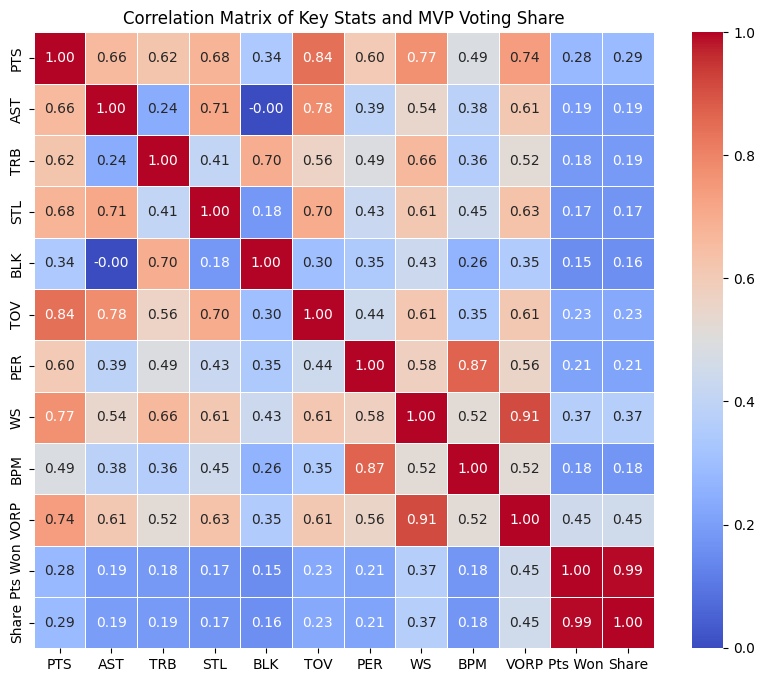

In [10]:
correlation_matrix = df[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PER', 'WS', 'BPM', 'VORP', 'Pts Won', 'Share']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Stats and MVP Voting Share")
plt.show()

**VORP(Value over replacement player), which compares how much better a basketball player does compared to a hypothetical average player, has the highest correlation with MVP voting pts won**

**Distribution of key statistics**

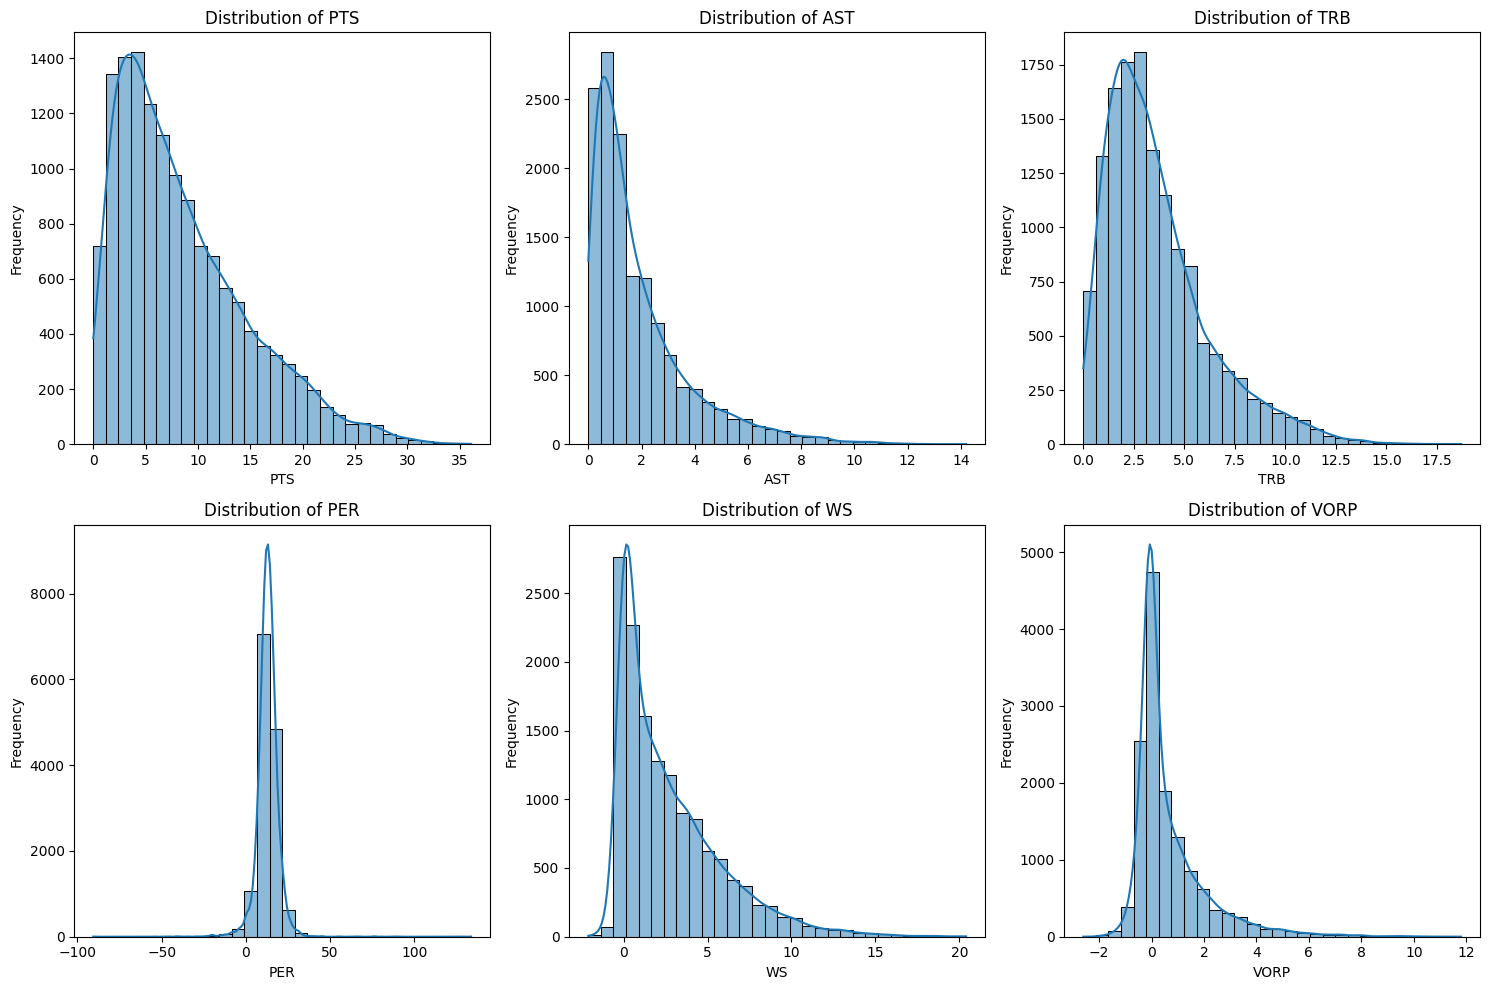

In [12]:
# Distribution of key statistics
# This section analyzes the distribution of key player statistics to understand player performance trends.
# - Helps identify patterns, outliers, and data skewness.
# - Determines whether certain stats (e.g., points, assists, win shares) follow a normal distribution or are skewed.
# - Assists in feature engineering for predictive models and historical trend analysis.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
stats_to_plot = ['PTS', 'AST', 'TRB', 'PER', 'WS', 'VORP']
for ax, stat in zip(axes.flatten(), stats_to_plot):
    sns.histplot(df[stat], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {stat}')
    ax.set_xlabel(stat)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**MVP trends over time**

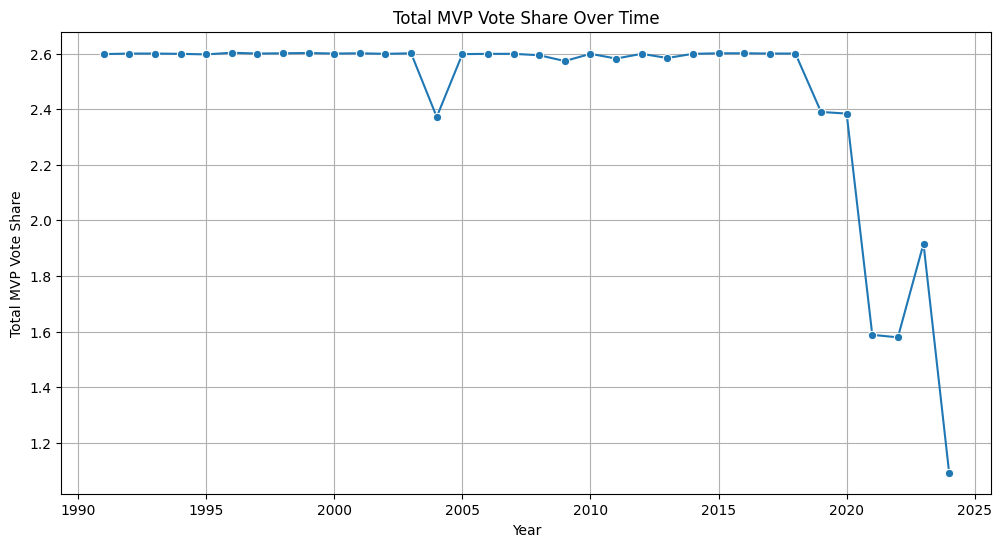

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("Year")["Share"].sum().reset_index(), x="Year", y="Share", marker="o")
plt.title("Total MVP Vote Share Over Time")
plt.xlabel("Year")
plt.ylabel("Total MVP Vote Share")
plt.grid(True)
plt.show()

*From the graph it is clear that mvp voting has changed in the past few years. There have been more evenly distributed votes across multiple players and fewer clear-cut MVP winners.*

**Position based MVP Trends, does position affect MVP voting**

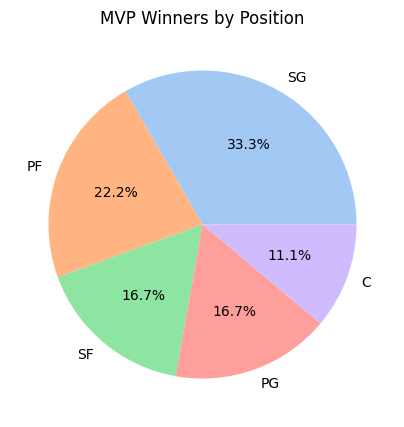

In [18]:
mvp_winners = df[df["Share"] > 0.9]  # Filter MVP winners
position_counts = mvp_winners["Pos"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("MVP Winners by Position")
plt.show()

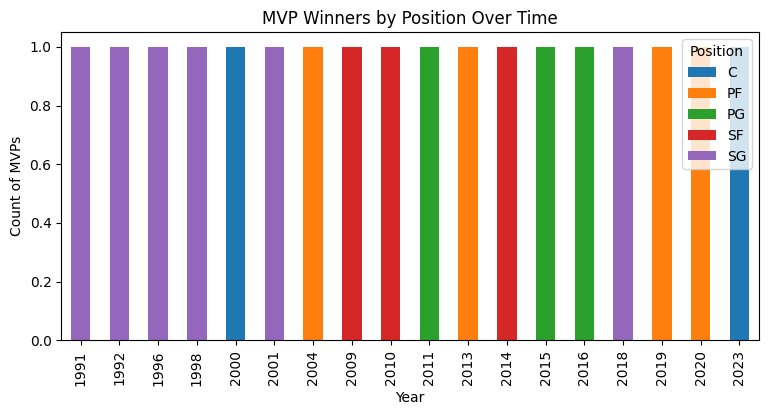

In [20]:
mvp_winners = df[df["Share"] > 0.9]  # Filter MVP winners (players with near-full vote share)
position_trends = mvp_winners.groupby(["Year", "Pos"]).size().unstack().fillna(0)

position_trends.plot(kind="bar", stacked=True, figsize=(9, 4))
plt.title("MVP Winners by Position Over Time")
plt.xlabel("Year")
plt.ylabel("Count of MVPs")
plt.legend(title="Position")
plt.show()

*While there is no clear majority, most of the awards have been won by shooting guards. The 2nd graph gives us more information on recent wins. From 2019-2020 season it seems like more big men like power forwards and centers have been winning the MVP award.*

**MVP-winning profiles, comparing mvp average stats vs Non-mvp stats to find what differentiates them**

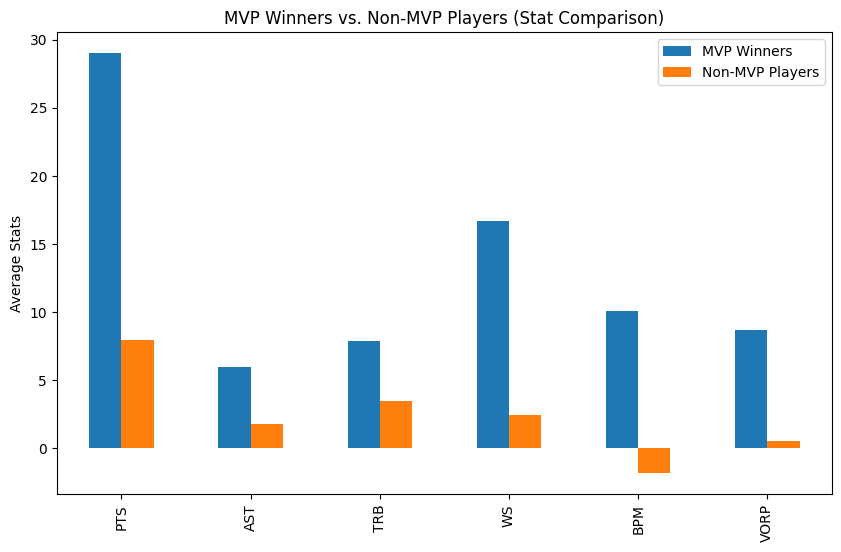

In [22]:
mvp_winners = df[df["Share"] > 0.9]  # MVP winners
non_mvp = df[df["Share"] == 0]  # Players who got no votes

mvp_stats = mvp_winners[["PTS", "AST", "TRB", "WS", "BPM", "VORP"]].mean()
non_mvp_stats = non_mvp[["PTS", "AST", "TRB", "WS", "BPM", "VORP"]].mean()

comparison_df = pd.DataFrame({"MVP Winners": mvp_stats, "Non-MVP Players": non_mvp_stats})
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("MVP Winners vs. Non-MVP Players (Stat Comparison)")
plt.ylabel("Average Stats")
plt.show()

*Graph clearly shows that mvp winners do almost twice as better compared to players with no votes for mvp*

**Do mvps always come from winning teams?**

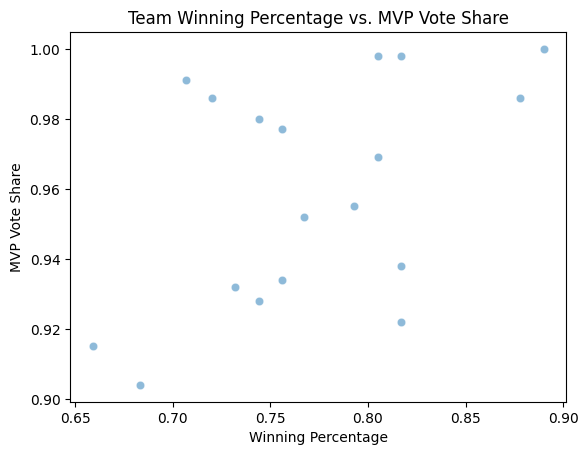

In [24]:
sns.scatterplot(data=mvp_winners, x="W/L%", y="Share", alpha=0.5)
plt.title("Team Winning Percentage vs. MVP Vote Share")
plt.xlabel("Winning Percentage")
plt.ylabel("MVP Vote Share")
plt.show()

*From the graph we can see that most mvp winners do come from high winning percentage teams, with the least win percentage being a little greater than 65%*